# Association Rule Mining in Retail Transactions

Association rule mining plays a pivotal role in extracting valuable insights from large-scale transactions data, commonly sourced from retail markets or online e-commerce platforms. In the realm of retail analytics, the Apriori algorithm emerges as a powerful tool, streamlining the process of uncovering intricate patterns and rules within vast datasets. The primary objective of Association Rules is to unveil robust patterns in transactional data, employing measures of interestingness to highlight significant relationships.

The Apriori algorithm adopts a "bottom-up" methodology, systematically extending frequent subsets one item at a time through candidate generation. These candidate groups are then rigorously tested against the transaction data. The algorithm iteratively refines its rules until no further meaningful extensions are discerned, leading to the identification of strong rules in the dataset.

In this project, we delve into the exploration of retail transactions data using Apriori, aiming to extract meaningful associations between products. From the initial preprocessing of transaction records to the generation of association rules and the creation of insightful visualizations, this project unfolds the journey of uncovering valuable knowledge embedded in the retail transaction landscape.


In [1]:
# importing required libraries
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df = pd.read_csv("Groceries_dataset.csv")

In [3]:
# display the first 10 rows of the DataFrame
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
# checking for null values
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

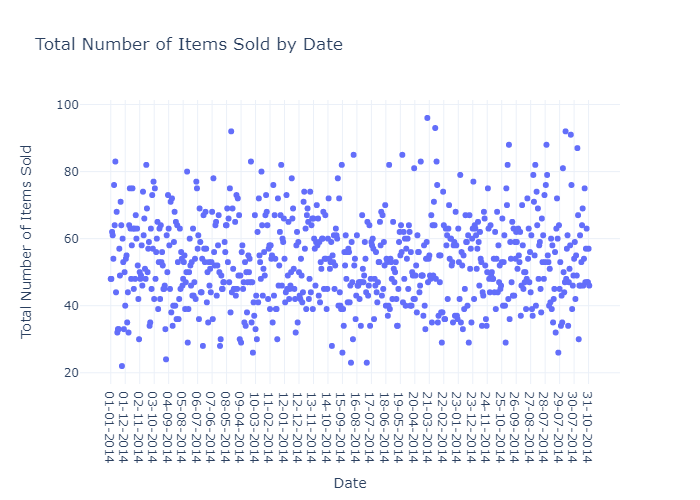

In [62]:
# grouping the data by date and count the number of items sold on each date
df_grouped = df.groupby(['Date'])['itemDescription'].agg(['count']).reset_index()

# create a scatter plot to visualize the total number of items sold by date
fig = px.scatter(df_grouped, x='Date', y='count', title="Total Number of Items Sold by Date",
                 labels={'count': 'Total Number of Items Sold'},
                 template='plotly_white')
fig.show("png")

In [7]:
# sets the 'Date' column as the index of the DataFrame
d=df.set_index(['Date'])

In [8]:
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [9]:
# converting the index of the DataFrame to datetime format
d.index=pd.to_datetime(d.index)

In [10]:
# calculating various statistics based on the DataFrame
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


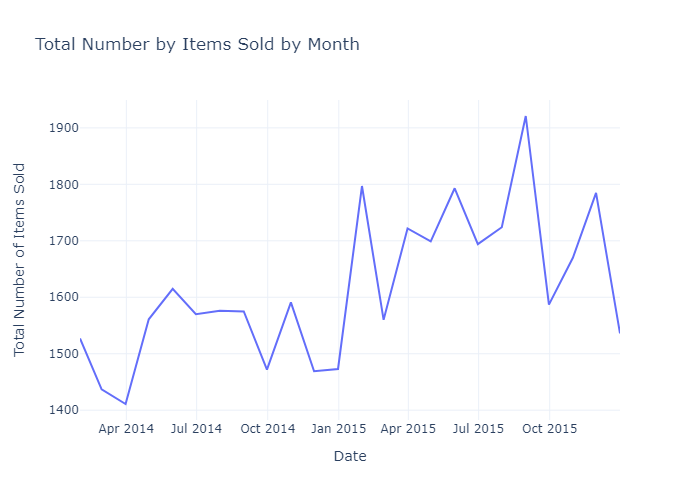

In [61]:
# create a line plot to visualize the total number of items sold per month
fig = px.line(d.resample("M")['itemDescription'].count(), 
              x=d.resample("M")['itemDescription'].count().index,
              y='itemDescription',
              labels={'itemDescription': 'Total Number of Items Sold', 'x': 'Date'},
              title="Total Number by Items Sold by Month",
              template='plotly_white')
fig.show("png")

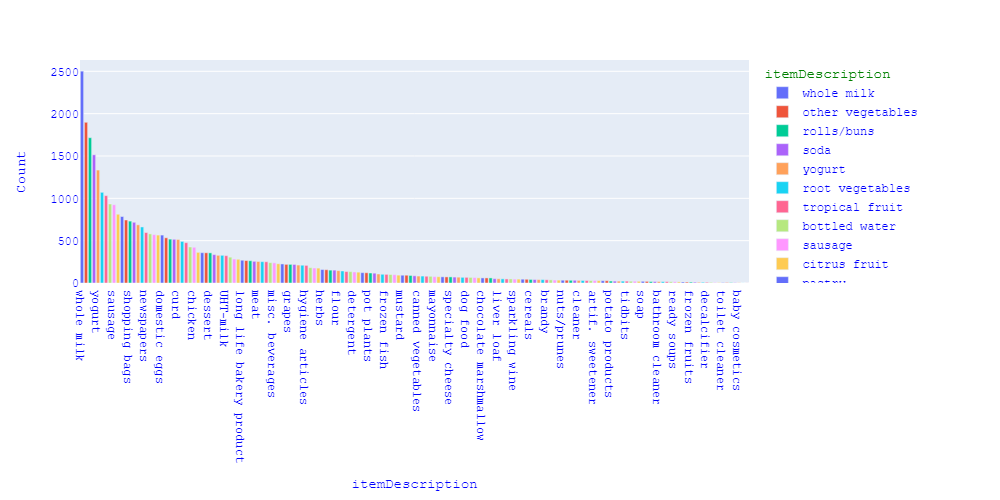

In [59]:
# creating a bar plot to visualize the count of items in the 'itemDescription' column.
def bar_plot(df, col):

    fig = px.bar(df,
                 x=df[col].value_counts().keys(),
                 y=df[col].value_counts().values,
                 color=df[col].value_counts().keys()
                 )

    fig.update_traces(hovertemplate="Item: %{x}<br>Count: %{y}")

    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        legend_title=col,
        font_family="Courier New",
        font_color="blue",
        title_font_family="Times New Roman",
        title_font_color="red",
        legend_title_font_color="green",
        width=1000,
        height=500
    )

    fig.show("png")

bar_plot(df, 'itemDescription')

In [13]:
# grouping transactions by 'Member_number' and 'Date'
transactions = df.groupby(['Member_number','Date'])

# displaying the count of items in each transaction
transactions.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [14]:
# creating a list of transactions where each transaction is represented as a list of item descriptions
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:20]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish']]

In [15]:
# applying the Apriori algorithm to mine association rules
rules = apriori(list_transactions, min_support=0.001, min_confidence=0.05, min_lift=1.2, min_length=2, max_length=2)

In [16]:
results = list(rules)

In [17]:
# calculating and displaying statistics for the generated association rules
total_rules = len(results)
total_support = sum(result[1] for result in results)
average_support = total_support / total_rules

total_confidence = sum(result[2][0][2] for result in results)
average_confidence = total_confidence / total_rules

total_lift = sum(result[2][0][3] for result in results)
average_lift = total_lift / total_rules

print(f"Total Rules: {total_rules}")
print(f"Average Support: {average_support:.2%}")
print(f"Average Confidence: {average_confidence:.2%}")
print(f"Average Lift: {average_lift:.6f}")

Total Rules: 28
Average Support: 0.15%
Average Confidence: 9.37%
Average Lift: 1.358671


In [18]:
def inspect(results):
    # extracting left-hand side (LHS) items from association rules
    lhs = [tuple(result[2][0][0])[0] for result in results]
    
    # extracting right-hand side (RHS) items from association rules
    rhs = [tuple(result[2][0][1])[0] for result in results]
    
    # extracting support values multiplied by 100 for percentage
    support = [result[1]*100 for result in results]
    
    # extracting confidence values multiplied by 100 for percentage
    confidence = [result[2][0][2]*100 for result in results]
    
    # extracting lift values
    lift = [result[2][0][3] for result in results]
    
    # returning a list of tuples containing information about each association rule
    return list(zip(lhs, rhs, support, confidence, lift))

# creating a DataFrame with the extracted information from association rules
final_result = pd.DataFrame(inspect(results), columns=['Product 1', 'Product 2', 'Support(%)', 'Confidence(%)', 'lift'])

# creating a new column 'Rule' combining LHS and RHS items for better readability
final_result['Rule'] = final_result['Product 1'] + '->' + final_result['Product 2']

In [19]:
final_result

,Product 1,Product 2,Support(%),Confidence(%),lift,Rule
0,beverages,sausage,0.153712,9.274194,1.536764,beverages->sausage
1,bottled beer,sausage,0.334158,7.374631,1.222000,bottled beer->sausage
2,sugar,bottled water,0.147029,8.301887,1.368074,sugar->bottled water
3,brown bread,canned beer,0.240593,6.394316,1.362937,brown bread->canned beer
4,candy,citrus fruit,0.100247,6.976744,1.313120,candy->citrus fruit
5,white bread,canned beer,0.153712,6.406685,1.365573,white bread->canned beer
6,cat food,tropical fruit,0.100247,8.474576,1.250543,cat food->tropical fruit
7,chewing gum,yogurt,0.140346,11.666667,1.358508,chewing gum->yogurt
8,specialty chocolate,citrus fruit,0.140346,8.786611,1.653762,specialty chocolate->citrus fruit
9,curd,sausage,0.294059,8.730159,1.446615,curd->sausage


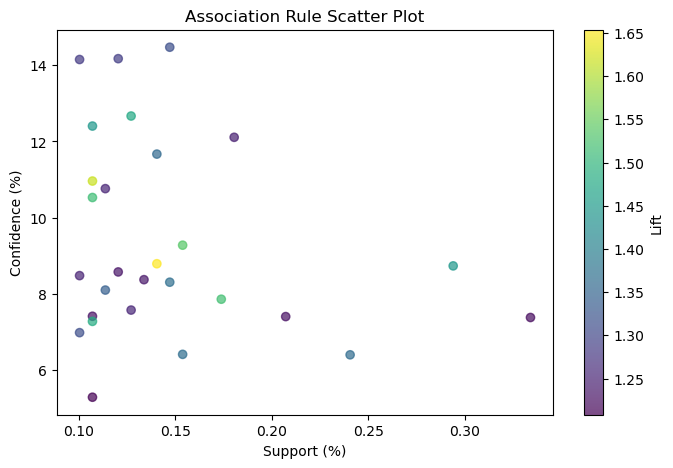

In [20]:
# creating a DataFrame for scatter plot data
scatter_df = pd.DataFrame({
    'LHS': final_result['Product 1'],
    'RHS': final_result['Product 2'],
    'Support': final_result['Support(%)'],
    'Confidence': final_result['Confidence(%)'],
    'Lift': final_result['lift']
})

# creating a scatter plot with Support on the x-axis, Confidence on the y-axis, and Lift as color
plt.figure(figsize=(8, 5))
plt.scatter(scatter_df['Support'], scatter_df['Confidence'], c=scatter_df['Lift'], cmap='viridis', alpha=0.7)
plt.title('Association Rule Scatter Plot')
plt.xlabel('Support (%)')
plt.ylabel('Confidence (%)')
plt.colorbar(label='Lift')
plt.show()

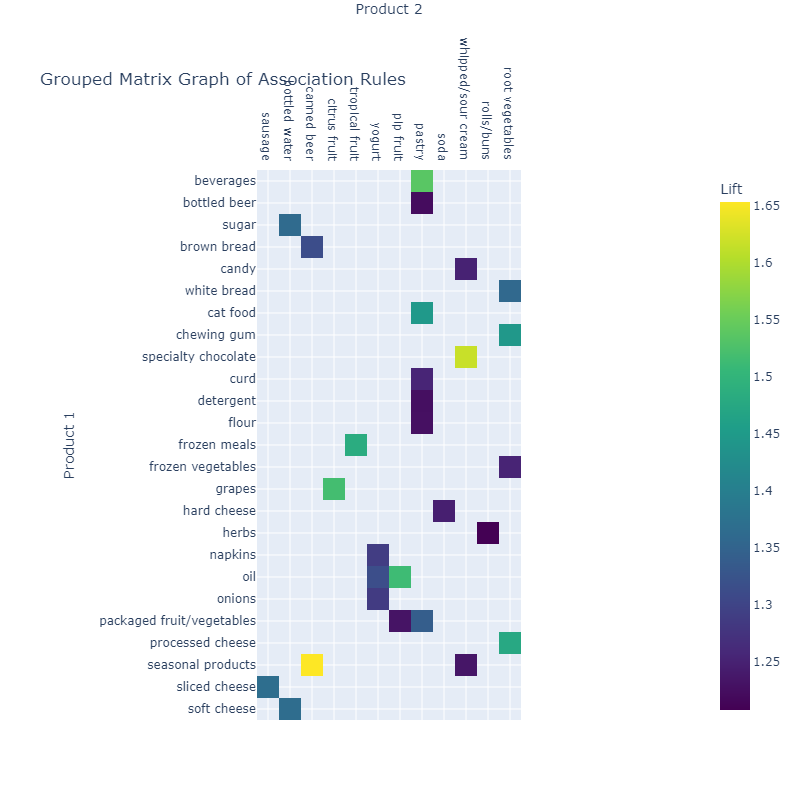

In [53]:
# creating a grouped matrix graph
fig = px.imshow(final_result.pivot_table(values='lift', index='Product 1', columns='Product 2', aggfunc='mean'),
                labels=dict(x="Product 2", y="Product 1", color="Lift"),
                x=final_result['Product 2'].unique(),
                y=final_result['Product 1'].unique(),
                color_continuous_scale='viridis',
                title='Grouped Matrix Graph of Association Rules')
fig.update_layout(
    width=800,
    height=800,
)

fig.update_xaxes(side="top")
fig.show("png")

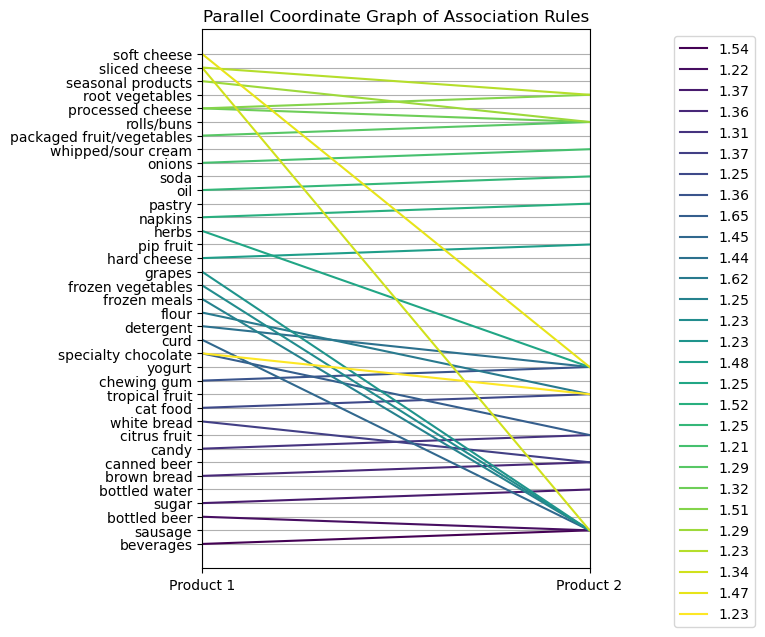

In [22]:
# creating a parallel coordinate graph
plt.figure(figsize=(5, 7))
ax = pd.plotting.parallel_coordinates(
    final_result[['Product 1', 'Product 2', 'lift']],
    class_column='lift',
    colormap='viridis',
    axvlines=False,
)
legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, [f"{round(float(label), 2):.2f}" for label in legend_labels],
          bbox_to_anchor=(1.2, 1.0), loc='upper left')

plt.title('Parallel Coordinate Graph of Association Rules')
plt.show()